In [ ]:
                                      ################    distilbert-base-uncased with BiLSTM.  #############################

In [ ]:
!pip install datasets
!pip install transformers
!pip install tensorflow transformers
!pip install transformers torch
!pip install flair==0.10
!pip install transformers==4.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-no

In [ ]:
from datasets import load_dataset,load_metric
dataset=load_dataset("surrey-nlp/PLOD-CW")
print(type(dataset))

<class 'datasets.dataset_dict.DatasetDict'>


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Extract the ner_tags column from your training data
train_labels = dataset['train']['ner_tags']
test_labels=dataset['test']['ner_tags']
val_labels=dataset['validation']['ner_tags']

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the list of lists of labels
y_train= mlb.fit_transform(train_labels)
y_test= mlb.transform(test_labels)
y_vals= mlb.transform(val_labels)
# Assuming mlb is your MultiLabelBinarizer instance
print("Classes encoded by MultiLabelBinarizer:", mlb.classes_)
print("Frequency of each class in training set:", y_train.sum(axis=0))
print("Frequency of each class in test set:", y_test.sum(axis=0))
print("Frequency of each class in test set:", y_vals.sum(axis=0))

print(y_train.shape)
print(y_test.shape)
print(y_vals.shape)

Classes encoded by MultiLabelBinarizer: ['B-AC' 'B-LF' 'B-O' 'I-LF']
Frequency of each class in training set: [ 958  856 1072  802]
Frequency of each class in test set: [131 113 153 100]
Frequency of each class in test set: [116 101 126  90]
(1072, 4)
(153, 4)
(126, 4)


In [ ]:


from flair.embeddings import TransformerWordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.data import Sentence
import torch
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from datasets import load_dataset

In [ ]:
# Extract documents from dataset
train_data = dataset['train']['tokens']
test_data = dataset['test']['tokens']
val_data = dataset['validation']['tokens']

In [ ]:
documents_train = [' '.join(sublist) for sublist in train_data]
documents_test = [' '.join(sublist) for sublist in test_data]
documents_val = [' '.join(sublist) for sublist in val_data]
print(documents_train)

['For this purpose the Gothenburg Young Persons Empowerment Scale ( GYPES ) was developed .', 'The following physiological traits were measured : stomatal conductance ( gs , mol H2O m-2 s-1 ) , transpiration rate ( E , mmol H2O m-2 s-1 ) , net photosynthetic rate ( PN , μmol m-2 s-1 ) and intercellular CO2 concentration CO2 ( Ci , μmol m-2 s-1 ) .', 'Minor H antigen alloimmune responses readily occur in the setting of human leukocyte antigen ( HLA)–matched allogeneic solid organ and stem cell transplantation ( SCT ) [ 3,4 ] .', 'EPI = Echo planar imaging .', 'Furthermore , eNOS - derived NO S - nitrosylated β - actin on Cys374 and impaired actin binding to profilin-1 ( PFN1 ) , as confirmed with the transnitrosylating agent S - nitroso - L - cysteine ( Cys-NO ) .', 'The importance of NO and the formation of PFN1 - actin complexes on the regulation of PKC was corroborated by overexpression of -θPFN1- and actin - binding defective mutants of β - actin ( C374S ) and PFN1 ( H119E ) , respe

In [ ]:
# Extract labels from dataset
train_labels = dataset['train']['ner_tags']
test_labels = dataset['test']['ner_tags']
val_labels = dataset['validation']['ner_tags']


In [ ]:
from flair.embeddings import TransformerWordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.data import Sentence
import torch
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from datasets import load_dataset



In [ ]:
from flair.embeddings import TransformerWordEmbeddings, FlairEmbeddings, StackedEmbeddings

# Initialize DistilBERT embeddings with the uncased tokenizer
distilbert_embeddings = TransformerWordEmbeddings('distilbert-base-uncased')
flair_forward = FlairEmbeddings('news-forward-fast')
flair_backward = FlairEmbeddings('news-backward-fast')

# Optionally, stack embeddings if needed
stacked_embeddings = StackedEmbeddings([distilbert_embeddings, flair_forward, flair_backward])



2024-04-24 20:10:56,625 No model_max_length in Tokenizer's config.json - setting it to 512. Specify desired model_max_length by passing it as attribute to embedding instance.


In [ ]:
from flair.data import Sentence
import torch

def embed_documents(documents, max_length=512):
    embedded_docs = []
    for doc in documents:
        # Split document into words and truncate if necessary
        words = doc.split()
        if len(words) > max_length:
            words = words[:max_length]
        truncated_doc = ' '.join(words)
        sentence = Sentence(truncated_doc)
        stacked_embeddings.embed(sentence)
        # Stack embeddings and append
        embedded_docs.append(torch.stack([token.embedding for token in sentence]))
    return pad_sequence(embedded_docs, batch_first=True)


In [ ]:
# Embedding documents
train_embedded = embed_documents(documents_train)
test_embedded = embed_documents(documents_test)
val_embedded = embed_documents(documents_val)

Token indices sequence length is longer than the specified maximum sequence length for this model (540 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
# Pad sequences for uniform input size
train_padded = pad_sequence(train_embedded, batch_first=True)
test_padded = pad_sequence(test_embedded, batch_first=True)
val_padded=pad_sequence(val_embedded, batch_first=True)



In [ ]:
import torch.nn as nn
class BiLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim):
        super(BiLSTM, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(2 * hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        # Apply the fully connected layer to every time step output
        output = self.fc(lstm_out)
        return output


In [ ]:
# Model initialization

from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

model = BiLSTM(embedding_dim=2816, hidden_dim=256, output_dim=4)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Dataloaders
train_data = TensorDataset(train_padded, torch.tensor(y_train, dtype=torch.long))
test_data = TensorDataset(test_padded, torch.tensor(y_test, dtype=torch.long))
val_data = TensorDataset(val_padded, torch.tensor(y_vals, dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
val_loader=DataLoader(val_data, batch_size=32, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the specified device
model = model.to(device)

# Function to move tensors to the device
def move_to_device(tensor):
    return tensor.to(device)

# Update DataLoader setup to automatically move tensors to the device
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield (b[0].to(self.device), b[1].to(self.device))

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

train_loader = DeviceDataLoader(train_loader, device)
test_loader = DeviceDataLoader(test_loader, device)
val_loader = DeviceDataLoader(val_loader, device)


Epoch 1: Training Loss = 1.647073885097223, Validation Loss = 0.3339185267686844
Epoch 2: Training Loss = 0.2790079432375291, Validation Loss = 0.26868192851543427
Epoch 3: Training Loss = 0.2040207519689027, Validation Loss = 0.29585152864456177
Epoch 4: Training Loss = 0.17573139071464539, Validation Loss = 0.2803567200899124
Epoch 5: Training Loss = 0.1312355061664301, Validation Loss = 0.26623836904764175


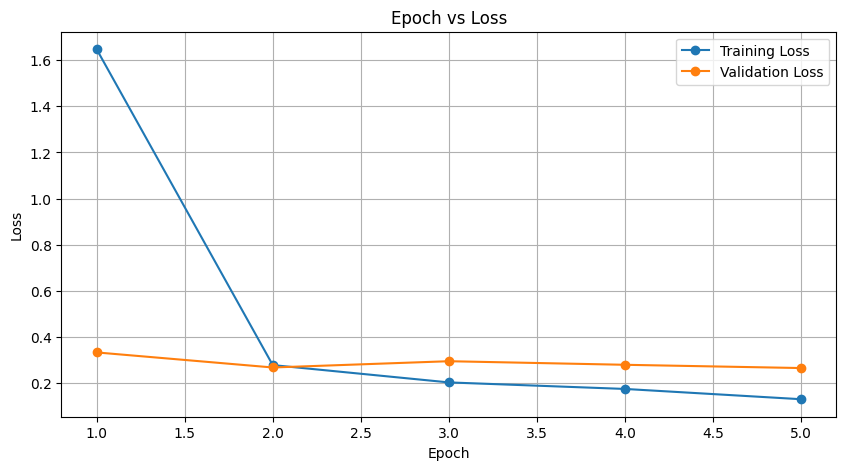

In [ ]:
import matplotlib.pyplot as plt

training_losses = []
validation_losses = []
model.train()

for epoch in range(5):
    total_train_loss = 0

    # Training loop
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    average_train_loss = total_train_loss / len(train_loader)
    training_losses.append(average_train_loss)

    # Validation loop
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    average_val_loss = total_val_loss / len(val_loader)
    validation_losses.append(average_val_loss)

    model.train()  # Switch back to training mode
    print(f'Epoch {epoch+1}: Training Loss = {average_train_loss}, Validation Loss = {average_val_loss}')

# Plotting the epoch vs loss graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), training_losses, marker='o', linestyle='-', label='Training Loss')
plt.plot(range(1, 6), validation_losses, marker='o', linestyle='-', label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Output shape:", outputs.shape)
print("Labels shape:", labels.shape)


Output shape: torch.Size([30, 222, 4])
Labels shape: torch.Size([30, 4])


In [ ]:
def evaluate_model(loader):
    model.eval()
    all_preds = []
    all_true = []
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(labels.cpu().numpy())
    return all_true, all_preds

# Evaluate on test and validation datasets
test_true, test_preds = evaluate_model(test_loader)
val_true, val_preds = evaluate_model(val_loader)

# Calculate performance metrics
test_accuracy = accuracy_score(test_true, test_preds)
val_accuracy = accuracy_score(val_true, val_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")




Test Accuracy: 0.7190
Validation Accuracy: 0.7302


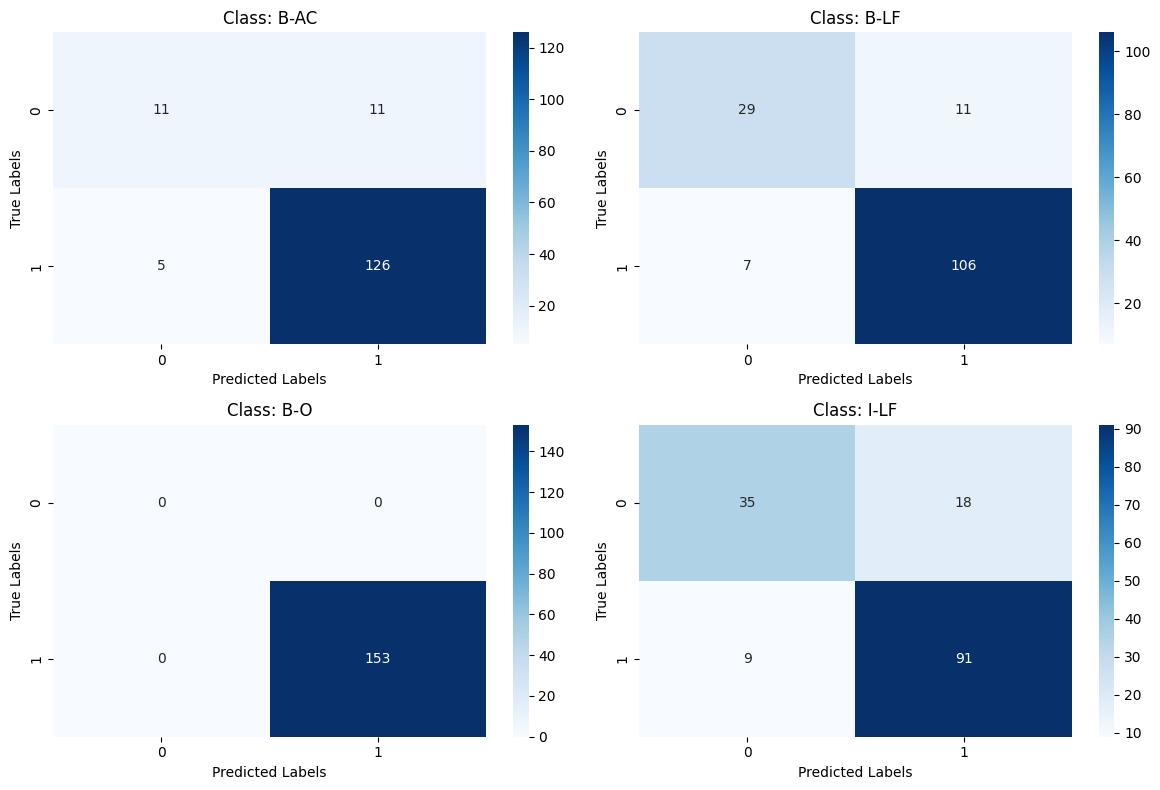

In [ ]:
def evaluate(model, data_loader):
    model.eval()
    all_preds = []
    all_true = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(labels.cpu().numpy())
    return all_true, all_preds



import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

def plot_multilabel_confusion_matrix(cms, classes):
    # Determine the layout size: number of classes dictates the grid
    num_classes = len(classes)
    fig, axes = plt.subplots(nrows=int(np.ceil(num_classes / 3)), ncols=2, figsize=(12, num_classes * 2))
    axes = axes.flatten()

    # Plot each matrix
    for i, cm in enumerate(cms):
        if i < len(axes):
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
            axes[i].set_title(f'Class: {classes[i]}')
            axes[i].set_xlabel('Predicted Labels')
            axes[i].set_ylabel('True Labels')

    # Hide any unused axes in the grid
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Evaluate on test data
test_true, test_preds = evaluate(model, test_loader)
# Assuming test_preds and test_true are appropriately formatted for multilabel classification
test_cms = multilabel_confusion_matrix(test_true, test_preds)
plot_multilabel_confusion_matrix(test_cms, mlb.classes_)

In [ ]:

def print_metrics(true, preds, description):
    accuracy = accuracy_score(true, preds)
    precision = precision_score(true, preds, average='macro', zero_division=0)
    recall = recall_score(true, preds, average='macro', zero_division=0)
    f1 = f1_score(true, preds, average='macro', zero_division=0)
    print(f"{description} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(true, preds, target_names=mlb.classes_))

# Evaluate on test data
test_true, test_preds = evaluate(model, test_loader)
print_metrics(test_true, test_preds, "Test Data")

# Evaluate on validation data
val_true, val_preds = evaluate(model, val_loader)
print_metrics(val_true, val_preds, "Validation Data")



Test Data - Accuracy: 0.7190, Precision: 0.9151, Recall: 0.9525, F1 Score: 0.9332
              precision    recall  f1-score   support

        B-AC       0.92      0.96      0.94       131
        B-LF       0.91      0.94      0.92       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.83      0.91      0.87       100

   micro avg       0.92      0.96      0.94       497
   macro avg       0.92      0.95      0.93       497
weighted avg       0.92      0.96      0.94       497
 samples avg       0.92      0.96      0.92       497

Validation Data - Accuracy: 0.7302, Precision: 0.9283, Recall: 0.9407, F1 Score: 0.9343
              precision    recall  f1-score   support

        B-AC       0.95      0.93      0.94       116
        B-LF       0.91      0.92      0.92       101
         B-O       1.00      1.00      1.00       126
        I-LF       0.85      0.91      0.88        90

   micro avg       0.93      0.94      0.94       433
   macro avg   

In [ ]:
 ###################          bert-base-uncased with BiLSTM.  #############################

In [ ]:
!pip install flair torch
from flair.embeddings import TransformerWordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.data import Sentence
import torch
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from datasets import load_dataset,load_metric

In [ ]:
from datasets import load_dataset,load_metric
dataset=load_dataset("surrey-nlp/PLOD-CW")
print(type(dataset))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1072 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/153 [00:00<?, ? examples/s]

<class 'datasets.dataset_dict.DatasetDict'>


In [ ]:
a=dataset['train']['tokens']
X_train = [' '.join(sublist) for sublist in a]

print(X_train)

['For this purpose the Gothenburg Young Persons Empowerment Scale ( GYPES ) was developed .', 'The following physiological traits were measured : stomatal conductance ( gs , mol H2O m-2 s-1 ) , transpiration rate ( E , mmol H2O m-2 s-1 ) , net photosynthetic rate ( PN , μmol m-2 s-1 ) and intercellular CO2 concentration CO2 ( Ci , μmol m-2 s-1 ) .', 'Minor H antigen alloimmune responses readily occur in the setting of human leukocyte antigen ( HLA)–matched allogeneic solid organ and stem cell transplantation ( SCT ) [ 3,4 ] .', 'EPI = Echo planar imaging .', 'Furthermore , eNOS - derived NO S - nitrosylated β - actin on Cys374 and impaired actin binding to profilin-1 ( PFN1 ) , as confirmed with the transnitrosylating agent S - nitroso - L - cysteine ( Cys-NO ) .', 'The importance of NO and the formation of PFN1 - actin complexes on the regulation of PKC was corroborated by overexpression of -θPFN1- and actin - binding defective mutants of β - actin ( C374S ) and PFN1 ( H119E ) , respe

In [ ]:
b=dataset['test']['tokens']
X_test = [' '.join(sublist) for sublist in b]

print(X_test)

['Abbreviations : GEMS , Global Enteric Multicenter Study ; VIP , ventilated improved pit .', 'Fractions from FPLC purification were treated with Laemmli buffer [ 82 ] with 10 mM 1,4 - dithiothreitol ( DTT ) and heated for 5 m at 85 ° C then analyzed on a 4 % to 15 % discontinuous SDS gel with a 6 % stacking gel run at ambient temperature at a constant 100 V. Two epithelial cytokines other than IL33 , IL25 , and thymic stromal lymphopoietin ( TSLP ) are known to activate ILC2 in the lung [ 22,24 ] .', 'We developed a variant of gene set enrichment analysis ( GSEA ) to determine whether a genetic pathway shows evidence for age regulation [ 23 ] .', 'Red represents samples having the normalized pY232 and/or pY291 values in cancer tissues ≥ 1.1 folds of normal tissues ( of which enhanced pY232 and/or pY291 level may be indicative of dominant survival mode of Fas signaling ) ; blue represents samples having both normalized pY232 and pY291 values < 1.1 ( of which pY232 and pY291 levels less

In [ ]:
c=dataset['validation']['tokens']
X_validation = [' '.join(sublist) for sublist in c]

print(X_validation)


['= Manual Ability Classification System ; QUEST = Quest - Quality of upper extremity skills test ; Cont = control ; M = male , F = female , V = verbal , nonV = non - Verbal , |Quad = quadriplegia , Di = Diplegia , Hemi = hemiplegia .', 'Electro - oculography ( EOG ) ( RetiPort32 , Roland Consult , Wiesbaden , Germany ) was performed in all patients according to the guidelines of the International Society for Clinical Electrophysiology of Vision ( ISCEV).[12 ] Arden ratios below 1.8 were rated as pathologic .', 'Soluble N - ethylmaleimide - sensitive factor attachment protein receptor ( SNARE ) proteins , including target- ( t- ) membrane SNAREs ( Syntaxins [ Syn ] ) and synaptosomal - associated proteins of 25 kDa ( SNAP25 ) and vesicle - associated membrane proteins ( VAMPs ) , are the fundamental components of the exocytotic machinery required for the docking and fusion of secretory granules ( SGs ) with the plasma membrane ( PM ) , which have been well studied in neurons [ 1 , 2 ] 

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Extract the ner_tags column from your training data
train_labels = dataset['train']['ner_tags']
test_labels=dataset['test']['ner_tags']
val_labels=dataset['validation']['ner_tags']

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the list of lists of labels
y_train= mlb.fit_transform(train_labels)
y_test= mlb.transform(test_labels)
y_vals= mlb.transform(val_labels)

In [ ]:
bert_embeddings = TransformerWordEmbeddings('bert-base-uncased')

# Initialize Flair embeddings (forward and backward)
flair_forward = FlairEmbeddings('news-forward-fast')
flair_backward = FlairEmbeddings('news-backward-fast')

# Stack embeddings
stacked_embeddings = StackedEmbeddings([
    bert_embeddings,
    flair_forward,
    flair_backward
])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

2024-04-24 21:06:15,544 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-news-english-forward-1024-v0.2rc.pt not found in cache, downloading to /tmp/tmpzix_cpet


100%|██████████| 19689779/19689779 [00:00<00:00, 35423813.88B/s]

2024-04-24 21:06:16,270 copying /tmp/tmpzix_cpet to cache at /root/.flair/embeddings/lm-news-english-forward-1024-v0.2rc.pt
2024-04-24 21:06:16,295 removing temp file /tmp/tmpzix_cpet


2024-04-24 21:06:16,588 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-news-english-backward-1024-v0.2rc.pt not found in cache, downloading to /tmp/tmpldee03iv


100%|██████████| 19689779/19689779 [00:00<00:00, 34690625.28B/s]

2024-04-24 21:06:17,306 copying /tmp/tmpldee03iv to cache at /root/.flair/embeddings/lm-news-english-backward-1024-v0.2rc.pt
2024-04-24 21:06:17,331 removing temp file /tmp/tmpldee03iv


In [ ]:
import torch


def embed_documents(documents):
    embedded_docs = []
    for doc in documents:
        sentence = Sentence(doc)
        stacked_embeddings.embed(sentence)
        # Collecting embedded vectors
        embedded_docs.append(torch.stack([token.embedding for token in sentence]))
    return embedded_docs


train_embedded = embed_documents(X_train)
test_embedded = embed_documents(X_test)
val_embedded=embed_documents(X_validation)

# Pad sequences for uniform input size
train_padded = pad_sequence(train_embedded, batch_first=True)
test_padded = pad_sequence(test_embedded, batch_first=True)
val_padded=pad_sequence(val_embedded, batch_first=True)

Token indices sequence length is longer than the specified maximum sequence length for this model (540 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
import torch.nn as nn
 # Define the BiLSTM model
class BiLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim):
        super(BiLSTM, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(2 * hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out)
        return out


Epoch 1: Training Loss = 1.5587482250788633, Validation Loss = 0.32885463163256645
Epoch 2: Training Loss = 0.28226398457499113, Validation Loss = 0.28660910204052925
Epoch 3: Training Loss = 0.20548109512995272, Validation Loss = 0.29358698427677155
Epoch 4: Training Loss = 0.1719404075513868, Validation Loss = 0.29166556522250175
Epoch 5: Training Loss = 0.11976823714726112, Validation Loss = 0.3027368001639843


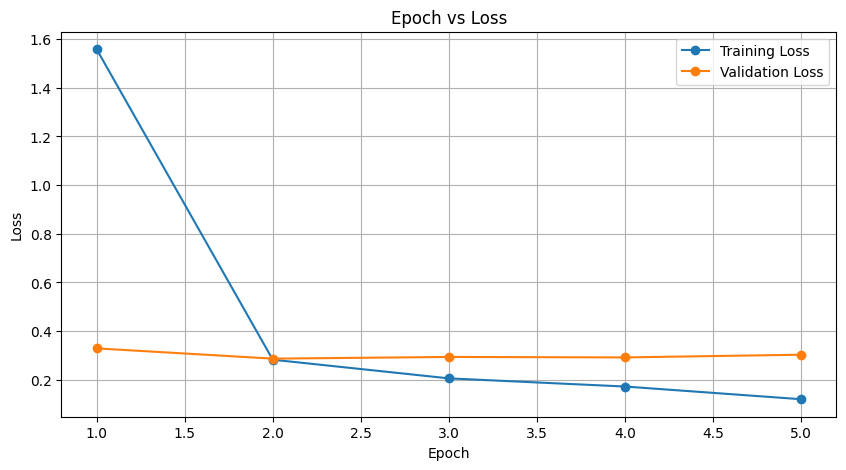

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import matplotlib.pyplot as plt

model = BiLSTM(embedding_dim=3072, hidden_dim=256, output_dim=len(mlb.classes_))  # 3072 = BERTa (768) + Flair (2*1152)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Dataloaders
train_data = TensorDataset(train_padded, torch.tensor(y_train, dtype=torch.long))
test_data = TensorDataset(test_padded, torch.tensor(y_test, dtype=torch.long))
val_data = TensorDataset(val_padded, torch.tensor(y_vals, dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
val_loader=DataLoader(val_data, batch_size=32, shuffle=False)



training_losses = []
validation_losses = []
model.train()

for epoch in range(5):
    total_train_loss = 0

    # Training loop
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    average_train_loss = total_train_loss / len(train_loader)
    training_losses.append(average_train_loss)

    # Validation loop
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    average_val_loss = total_val_loss / len(val_loader)
    validation_losses.append(average_val_loss)

    model.train()  # Switch back to training mode
    print(f'Epoch {epoch+1}: Training Loss = {average_train_loss}, Validation Loss = {average_val_loss}')

# Plotting the epoch vs loss graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), training_losses, marker='o', linestyle='-', label='Training Loss')
plt.plot(range(1, 6), validation_losses, marker='o', linestyle='-', label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def evaluate_model(loader):
    model.eval()
    all_preds = []
    all_true = []
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(labels.cpu().numpy())
    return all_true, all_preds

# Evaluate on test and validation datasets
test_true, test_preds = evaluate_model(test_loader)
val_true, val_preds = evaluate_model(val_loader)

# Calculate performance metrics
test_accuracy = accuracy_score(test_true, test_preds)
val_accuracy = accuracy_score(val_true, val_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Test Accuracy: 0.6667
Validation Accuracy: 0.6984


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the specified device
model = model.to(device)

# Function to move tensors to the device
def move_to_device(tensor):
    return tensor.to(device)

# Update DataLoader setup to automatically move tensors to the device
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield (b[0].to(self.device), b[1].to(self.device))

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

train_loader = DeviceDataLoader(train_loader, device)
test_loader = DeviceDataLoader(test_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

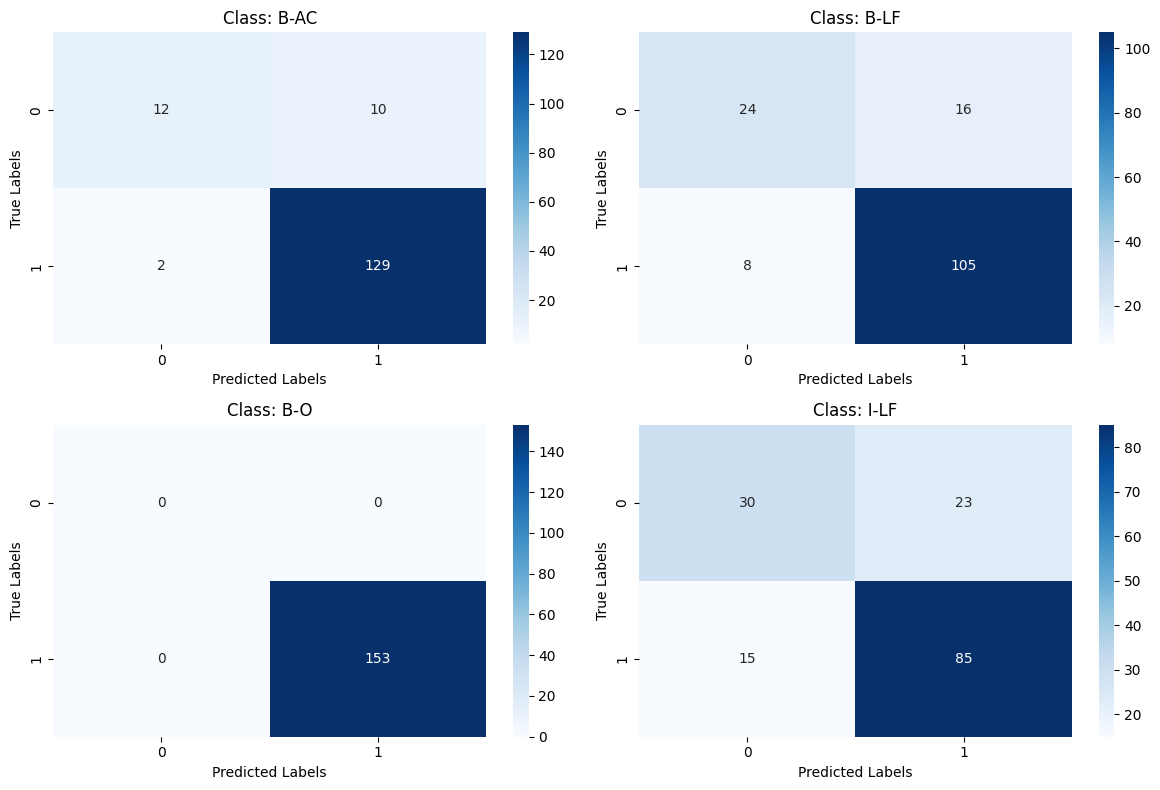

In [ ]:
def evaluate(model, data_loader):
    model.eval()
    all_preds = []
    all_true = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(labels.cpu().numpy())
    return all_true, all_preds



import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

def plot_multilabel_confusion_matrix(cms, classes):
    # Determine the layout size: number of classes dictates the grid
    num_classes = len(classes)
    fig, axes = plt.subplots(nrows=int(np.ceil(num_classes / 3)), ncols=2, figsize=(12, num_classes * 2))
    axes = axes.flatten()

    # Plot each matrix
    for i, cm in enumerate(cms):
        if i < len(axes):
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
            axes[i].set_title(f'Class: {classes[i]}')
            axes[i].set_xlabel('Predicted Labels')
            axes[i].set_ylabel('True Labels')

    # Hide any unused axes in the grid
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Evaluate on test data
test_true, test_preds = evaluate(model, test_loader)
# Assuming test_preds and test_true are appropriately formatted for multilabel classification
test_cms = multilabel_confusion_matrix(test_true, test_preds)
plot_multilabel_confusion_matrix(test_cms, mlb.classes_)

In [ ]:
def print_metrics(true, preds, description):
    accuracy = accuracy_score(true, preds)
    precision = precision_score(true, preds, average='macro', zero_division=0)
    recall = recall_score(true, preds, average='macro', zero_division=0)
    f1 = f1_score(true, preds, average='macro', zero_division=0)
    print(f"{description} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(true, preds, target_names=mlb.classes_))

# Evaluate on test data
test_true, test_preds = evaluate(model, test_loader)
print_metrics(test_true, test_preds, "Test Data")

# Evaluate on validation data
val_true, val_preds = evaluate(model, val_loader)
print_metrics(val_true, val_preds, "Validation Data")


Test Data - Accuracy: 0.6667, Precision: 0.8957, Recall: 0.9410, F1 Score: 0.9176
              precision    recall  f1-score   support

        B-AC       0.93      0.98      0.96       131
        B-LF       0.87      0.93      0.90       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.79      0.85      0.82       100

   micro avg       0.91      0.95      0.93       497
   macro avg       0.90      0.94      0.92       497
weighted avg       0.91      0.95      0.93       497
 samples avg       0.91      0.96      0.91       497

Validation Data - Accuracy: 0.6984, Precision: 0.9132, Recall: 0.9290, F1 Score: 0.9209
              precision    recall  f1-score   support

        B-AC       0.95      0.95      0.95       116
        B-LF       0.89      0.90      0.90       101
         B-O       1.00      1.00      1.00       126
        I-LF       0.81      0.87      0.84        90

   micro avg       0.92      0.94      0.93       433
   macro avg   

In [ ]:
#####################################################################TFIDF WITH BiLSTM. ############################################################

In [ ]:
!pip install datasets
!pip install transformers


import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

from collections import Counter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 36.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
dataset = datasets.load_dataset("surrey-nlp/PLOD-CW")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1072 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/153 [00:00<?, ? examples/s]

In [ ]:
train = dataset["train"]['tokens']

In [ ]:
test = dataset["test"]['tokens']

In [ ]:
validation = dataset["validation"]['tokens']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert list of tokens into sentences
sentences = [" ".join(sentence) for sentence in train]
sentences_test = [" ".join(sentence) for sentence in test]
sentences_val = [" ".join(sentence) for sentence in validation]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the data to compute TF-IDF
tfidf_matrix_train = vectorizer.fit_transform(sentences)
tfidf_matrix_test = vectorizer.transform(sentences_test)
tfidf_matrix_val = vectorizer.transform(sentences_val)

# Feature names corresponding to each column in the TF-IDF matrix
feature_names = vectorizer.get_feature_names_out()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

train_labels = dataset["train"]["ner_tags"]
test_labels = dataset["test"]["ner_tags"]
val_labels = dataset["validation"]["ner_tags"]

# print(train_labels)

mlb = MultiLabelBinarizer()

y_train = mlb.fit_transform(train_labels)
y_test = mlb.transform(test_labels)
y_val = mlb.transform(val_labels)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(1072, 4)
(153, 4)
(126, 4)


In [ ]:
# Convert the sparse matrix to a dense array and reshape to include the time step dimension for LSTM input
X_train = tfidf_matrix_train.toarray().reshape(tfidf_matrix_train.shape[0], 1, tfidf_matrix_train.shape[1])
X_test = tfidf_matrix_test.toarray().reshape(tfidf_matrix_test.shape[0], 1, tfidf_matrix_test.shape[1])
X_val = tfidf_matrix_val.toarray().reshape(tfidf_matrix_val.shape[0], 1, tfidf_matrix_val.shape[1])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, hamming_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer


# Define the BiLSTM model
model = Sequential([
    Bidirectional(LSTM(128, activation='relu'), input_shape=(1, X_train.shape[2])),
    Dense(256, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')  # Output layer with sigmoid for multi-label classification
])

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the model training parameters
optimizer = Nadam(learning_rate=0.001)
loss = BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Setup callbacks for early stopping and best model checkpointing
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min', restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
]


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/10
34/34 [==============================] - ETA: 0s - loss: 0.5898 - accuracy: 0.1091
Epoch 1: val_loss improved from inf to 0.36982, saving model to best_model.keras
34/34 [==============================] - 5s 66ms/step - loss: 0.5898 - accuracy: 0.1091 - val_loss: 0.3698 - val_accuracy: 0.0794
Epoch 2/10
33/34 [============================>.] - ETA: 0s - loss: 0.3253 - accuracy: 0.1023
Epoch 2: val_loss improved from 0.36982 to 0.31384, saving model to best_model.keras
34/34 [==============================] - 2s 49ms/step - loss: 0.3250 - accuracy: 0.1017 - val_loss: 0.3138 - val_accuracy: 0.0794
Epoch 3/10
33/34 [============================>.] - ETA: 0s - loss: 0.2493 - accuracy: 0.1013
Epoch 3: val_loss improved from 0.31384 to 0.30990, saving model to best_model.keras
34/34 [==============================] - 2s 52ms/step - loss: 0.2496 - accuracy: 0.1017 - val_loss: 0.3099 - val_accuracy: 0.0794
Epoch 4/10
33/34 [============================>.] - ETA: 0s - loss: 0.1626 - 

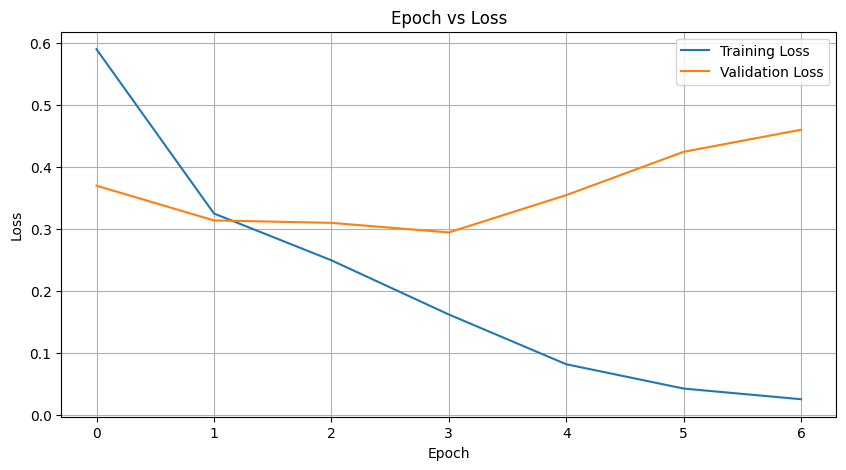

In [ ]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the model on the training and validation set
train_scores = model.evaluate(X_train, y_train, verbose=0)
val_scores = model.evaluate(X_val, y_val, verbose=0)
print(f"Training Loss: {train_scores[0]}, Training Accuracy: {train_scores[1]}")
print(f"Validation Loss: {val_scores[0]}, Validation Accuracy: {val_scores[1]}")

Training Loss: 0.11072757095098495, Training Accuracy: 0.10167910158634186
Validation Loss: 0.29444339871406555, Validation Accuracy: 0.0793650820851326


In [ ]:
# Predict the probabilities for training and validation sets
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

# Convert probabilities to 0 or 1 using 0.5 as the threshold
train_preds_binary = (train_preds > 0.5).astype(int)
val_preds_binary = (val_preds > 0.5).astype(int)

# Print classification report for both sets
print("\nClassification Report for Training Data:")
print(classification_report(y_train, train_preds_binary, target_names=mlb.classes_))

print("\nClassification Report for Validation Data:")
print(classification_report(y_val, val_preds_binary, target_names=mlb.classes_))


4/4 [==============================] - 0s 7ms/step

Classification Report for Training Data:
              precision    recall  f1-score   support

        B-AC       0.89      1.00      0.94       958
        B-LF       0.99      0.99      0.99       856
         B-O       1.00      1.00      1.00      1072
        I-LF       0.99      1.00      0.99       802

   micro avg       0.97      1.00      0.98      3688
   macro avg       0.97      1.00      0.98      3688
weighted avg       0.97      1.00      0.98      3688
 samples avg       0.94      1.00      0.96      3688


Classification Report for Validation Data:
              precision    recall  f1-score   support

        B-AC       0.92      1.00      0.96       116
        B-LF       0.82      1.00      0.90       101
         B-O       1.00      1.00      1.00       126
        I-LF       0.75      0.99      0.85        90

   micro avg       0.87      1.00      0.93       433
   macro avg       0.87      1.00      0.93     

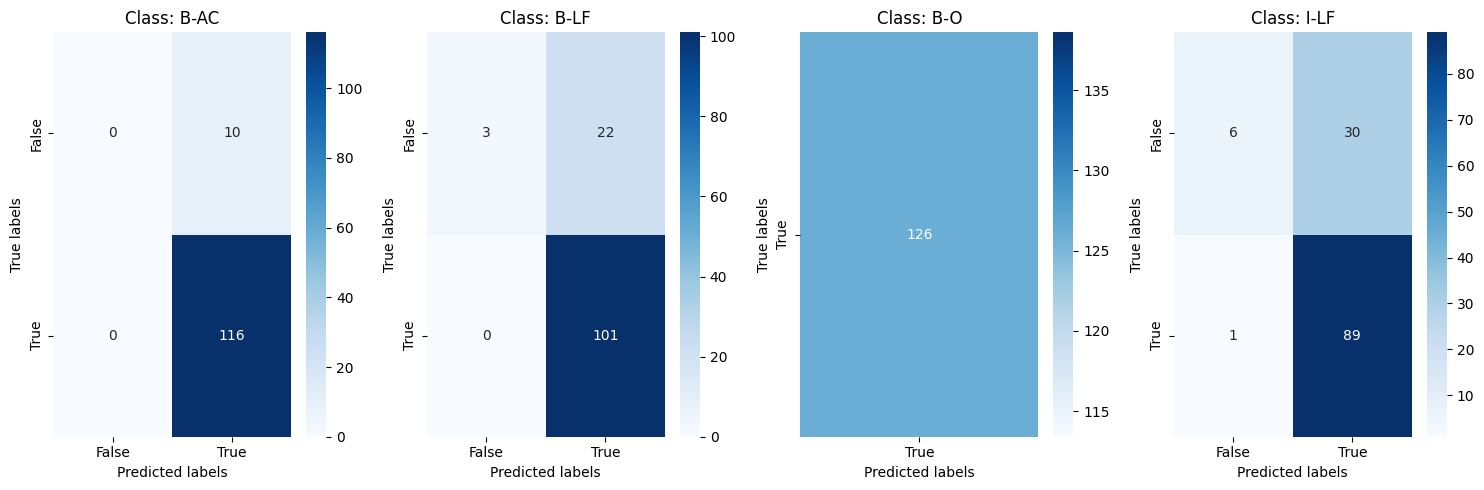

In [ ]:
def plot_confusion_matrices(y_true, y_pred, classes):
    fig, axes = plt.subplots(nrows=1, ncols=len(classes), figsize=(15, 5))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        cm = confusion_matrix(y_true[:, i], y_pred[:, i])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(f'Class: {classes[i]}')

        # Determine the number of unique labels which will be either 1 or 2
        num_labels = np.unique([y_true[:, i], y_pred[:, i]]).size

        # Set the tick labels based on the number of unique labels
        if num_labels == 1:  # Only one class present, either 'False' or 'True'
            ticks = ['True'] if cm.sum() else ['False']
            ax.set_xticklabels(ticks)
            ax.set_yticklabels(ticks)
        else:  # Both 'False' and 'True' are present
            ax.set_xticklabels(['False', 'True'])
            ax.set_yticklabels(['False', 'True'])

    plt.tight_layout()
    plt.show()

# Then call the function to plot the confusion matrices
plot_confusion_matrices(y_val, val_preds_binary, mlb.classes_)

In [ ]:
########################################################################### COMPARISON #########################################################

In [ ]:
import pandas as pd

# Data for the 'distilbert' model on the test set.
distilbert_test_data = {
    'Model': 'DistilBERT',
    'Data': 'Test',
    'Accuracy': 0.7190,
    'Precision': 0.9151,
    'Recall': 0.9525,
    'F1 Score': 0.9332,
    'Support': 497
}

# Data for the 'distilbert' model on the validation set.
distilbert_val_data = {
    'Model': 'DistilBERT',
    'Data': 'Validation',
    'Accuracy': 0.7302,
    'Precision': 0.9283,
    'Recall': 0.9407,
    'F1 Score': 0.9343,
    'Support': 433
}

# Data for the 'bert uncased' model on the test set.
bert_uncased_test_data = {
    'Model': 'BERT Uncased',
    'Data': 'Test',
    'Accuracy': 0.6667,
    'Precision': 0.8957,
    'Recall': 0.9410,
    'F1 Score': 0.9176,
    'Support': 497
}

# Data for the 'bert uncased' model on the validation set.
bert_uncased_val_data = {
    'Model': 'BERT Uncased',
    'Data': 'Validation',
    'Accuracy': 0.6984,
    'Precision': 0.9132,
    'Recall': 0.9290,
    'F1 Score': 0.9209,
    'Support': 433
}

# Combine the data into a DataFrame for comparison
comparison_data = pd.DataFrame([distilbert_test_data, distilbert_val_data,
                                bert_uncased_test_data, bert_uncased_val_data])

# Reformat the DataFrame to a table-like form for better readability
comparison_table = comparison_data.pivot(index='Model', columns='Data', values=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Support'])
comparison_table.reset_index(inplace=True)

# Display the table
comparison_table


Model Accuracy            Precision             Recall  \
Data                   Test Validation      Test Validation    Test   
0     BERT Uncased   0.6667     0.6984    0.8957     0.9132  0.9410   
1       DistilBERT   0.7190     0.7302    0.9151     0.9283  0.9525   

                F1 Score            Support             
Data Validation     Test Validation    Test Validation  
0        0.9290   0.9176     0.9209   497.0      433.0  
1        0.9407   0.9332     0.9343   497.0      433.0

In [ ]:
import pandas as pd

# Create a DataFrame with the performance metrics
data = {
    'Model': ['DistilBERT', 'DistilBERT', 'BERT Uncased', 'BERT Uncased'],
    'Data Type': ['Test', 'Validation', 'Test', 'Validation'],
    'Accuracy': [0.7190, 0.7302, 0.6667, 0.6984],
    'Precision': [0.9151, 0.9283, 0.8957, 0.9132],
    'Recall': [0.9525, 0.9407, 0.9410, 0.9290],
    'F1 Score': [0.9332, 0.9343, 0.9176, 0.9209]
}

df = pd.DataFrame(data)
print(df)


          Model   Data Type  Accuracy  Precision  Recall  F1 Score
0    DistilBERT        Test    0.7190     0.9151  0.9525    0.9332
1    DistilBERT  Validation    0.7302     0.9283  0.9407    0.9343
2  BERT Uncased        Test    0.6667     0.8957  0.9410    0.9176
3  BERT Uncased  Validation    0.6984     0.9132  0.9290    0.9209


In [ ]:
# Creating a simpler comparison table without pivoting

# Define the metrics and the values for each model on test and validation sets
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
distilbert_test = [0.7190, 0.9151, 0.9525, 0.9332]
distilbert_val = [0.7302, 0.9283, 0.9407, 0.9343]
bert_uncased_test = [0.6667, 0.8957, 0.9410, 0.9176]
bert_uncased_val = [0.6984, 0.9132, 0.9290, 0.9209]

# Create a DataFrame
df = pd.DataFrame({
    "Metric": metrics,
    "DistilBERT Test": distilbert_test,
    "DistilBERT Validation": distilbert_val,
    "BERT Uncased Test": bert_uncased_test,
    "BERT Uncased Validation": bert_uncased_val
})

df


,Metric,DistilBERT Test,DistilBERT Validation,BERT Uncased Test,BERT Uncased Validation
0,Accuracy,0.7190,0.7302,0.6667,0.6984
1,Precision,0.9151,0.9283,0.8957,0.9132
2,Recall,0.9525,0.9407,0.9410,0.9290
3,F1 Score,0.9332,0.9343,0.9176,0.9209


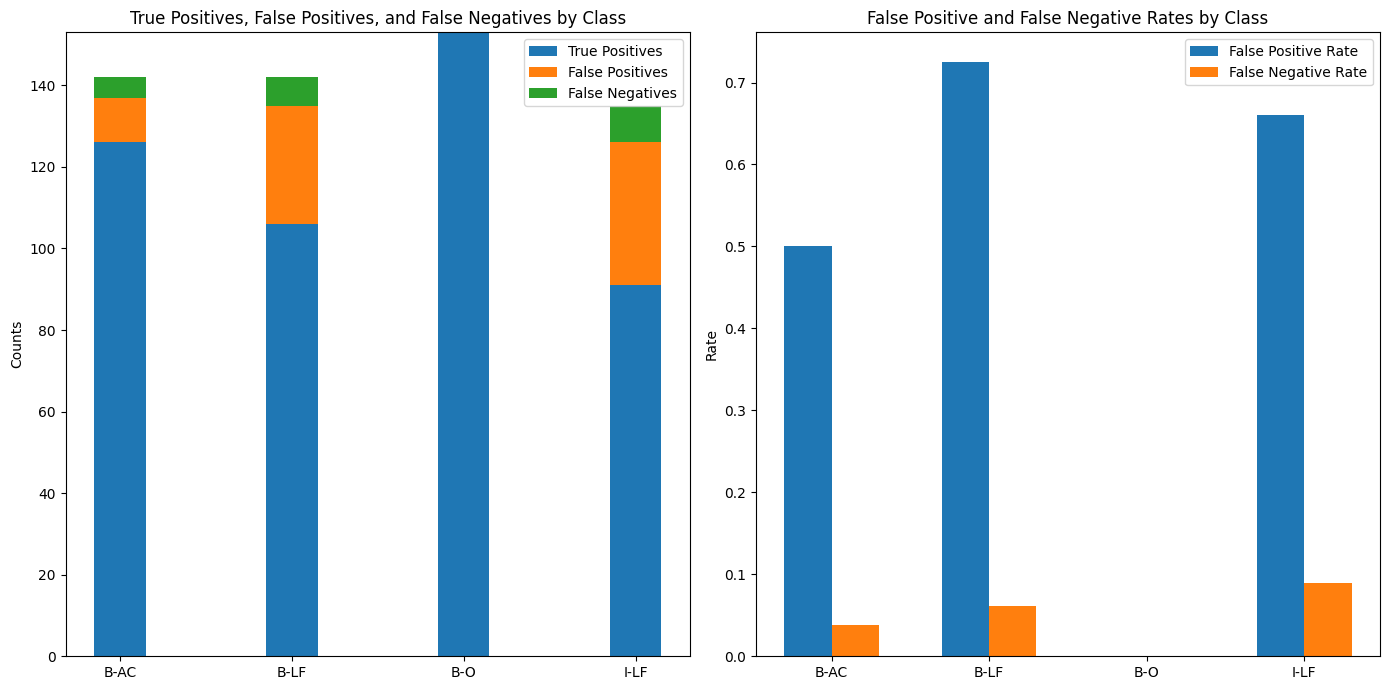

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for each class again for plotting
class_metrics = {
    'B-AC': {'TP': 126, 'FN': 5, 'FP': 11, 'TN': 11},
    'B-LF': {'TP': 106, 'FN': 7, 'FP': 29, 'TN': 11},
    'B-O': {'TP': 153, 'FN': 0, 'FP': 0, 'TN': 0},  # Assuming no FN, FP, TN for B-O
    'I-LF': {'TP': 91, 'FN': 9, 'FP': 35, 'TN': 18}
}

# Calculate false positive rate (FPR) and false negative rate (FNR) for each class
for metrics in class_metrics.values():
    metrics['FPR'] = metrics['FP'] / (metrics['FP'] + metrics['TN']) if (metrics['FP'] + metrics['TN']) > 0 else 0
    metrics['FNR'] = metrics['FN'] / (metrics['TP'] + metrics['FN']) if (metrics['TP'] + metrics['FN']) > 0 else 0

# Extract values for plotting
classes = list(class_metrics.keys())
TPs = [metrics['TP'] for metrics in class_metrics.values()]
FPs = [metrics['FP'] for metrics in class_metrics.values()]
FNs = [metrics['FN'] for metrics in class_metrics.values()]
FPRs = [metrics['FPR'] for metrics in class_metrics.values()]
FNRs = [metrics['FNR'] for metrics in class_metrics.values()]

# Set up the figure size and subplots
plt.figure(figsize=(14, 7))

# Subplot for the True Positives, False Positives, and False Negatives
plt.subplot(1, 2, 1)
width = 0.3  # the width of the bars
ind = np.arange(len(classes))  # the x locations for the groups

p1 = plt.bar(ind, TPs, width, label='True Positives')
p2 = plt.bar(ind, FPs, width, bottom=TPs, label='False Positives')
p3 = plt.bar(ind, FNs, width, bottom=np.array(TPs)+np.array(FPs), label='False Negatives')

plt.ylabel('Counts')
plt.title('True Positives, False Positives, and False Negatives by Class')
plt.xticks(ind, classes)
plt.legend()

# Subplot for the False Positive Rate and False Negative Rate
plt.subplot(1, 2, 2)

p4 = plt.bar(ind, FPRs, width, label='False Positive Rate')
p5 = plt.bar(ind + width, FNRs, width, label='False Negative Rate')

plt.ylabel('Rate')
plt.title('False Positive and False Negative Rates by Class')
plt.xticks(ind + width / 2, classes)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


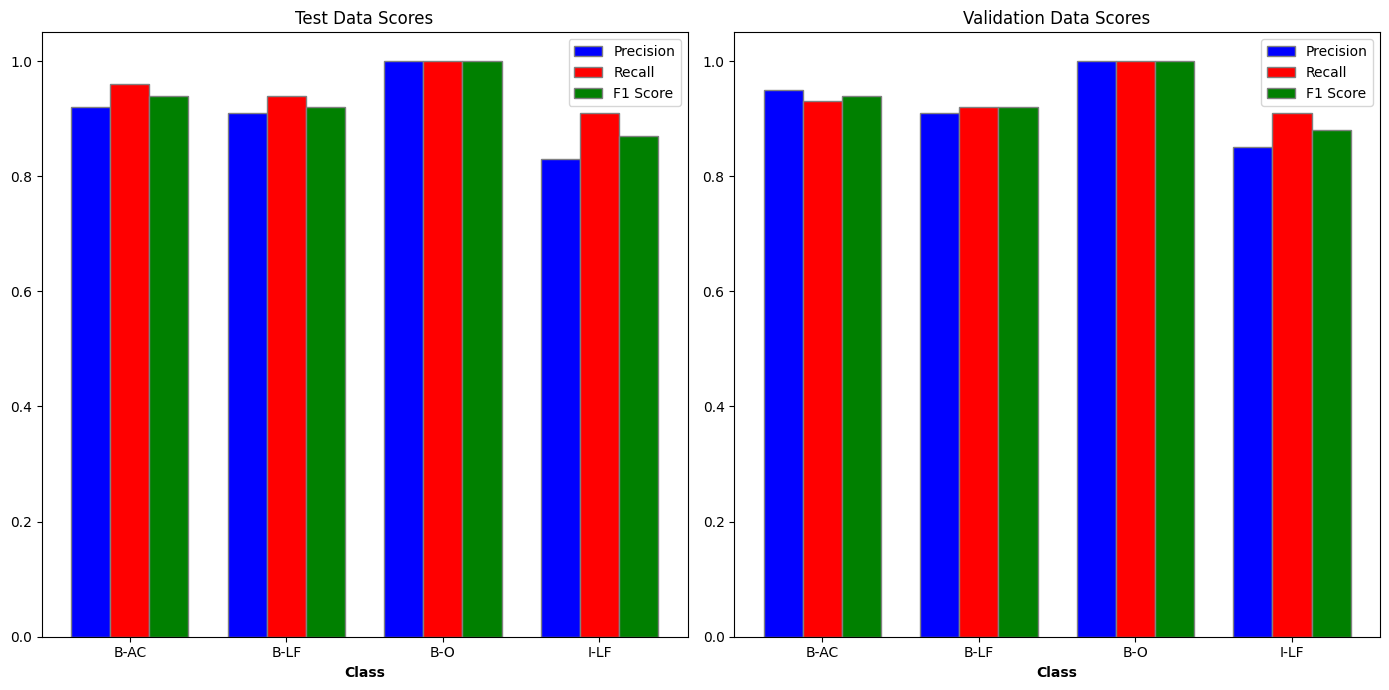

In [ ]:
import matplotlib.pyplot as plt

# Data from user input
test_scores = {
    'B-AC': {'Precision': 0.92, 'Recall': 0.96, 'F1 Score': 0.94},
    'B-LF': {'Precision': 0.91, 'Recall': 0.94, 'F1 Score': 0.92},
    'B-O': {'Precision': 1.00, 'Recall': 1.00, 'F1 Score': 1.00},
    'I-LF': {'Precision': 0.83, 'Recall': 0.91, 'F1 Score': 0.87},
}

validation_scores = {
    'B-AC': {'Precision': 0.95, 'Recall': 0.93, 'F1 Score': 0.94},
    'B-LF': {'Precision': 0.91, 'Recall': 0.92, 'F1 Score': 0.92},
    'B-O': {'Precision': 1.00, 'Recall': 1.00, 'F1 Score': 1.00},
    'I-LF': {'Precision': 0.85, 'Recall': 0.91, 'F1 Score': 0.88},
}

# Set up the figure size and subplots
plt.figure(figsize=(14, 7))

# Subplot for Test Data Scores
plt.subplot(1, 2, 1)
test_precision = [test_scores[cls]['Precision'] for cls in test_scores]
test_recall = [test_scores[cls]['Recall'] for cls in test_scores]
test_f1 = [test_scores[cls]['F1 Score'] for cls in test_scores]

bar_width = 0.25  # the width of the bars
r1 = np.arange(len(test_precision))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, test_precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, test_recall, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, test_f1, color='g', width=bar_width, edgecolor='grey', label='F1 Score')

plt.xlabel('Class', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(test_precision))], ['B-AC', 'B-LF', 'B-O', 'I-LF'])
plt.title('Test Data Scores')
plt.legend()

# Subplot for Validation Data Scores
plt.subplot(1, 2, 2)
validation_precision = [validation_scores[cls]['Precision'] for cls in validation_scores]
validation_recall = [validation_scores[cls]['Recall'] for cls in validation_scores]
validation_f1 = [validation_scores[cls]['F1 Score'] for cls in validation_scores]

plt.bar(r1, validation_precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, validation_recall, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, validation_f1, color='g', width=bar_width, edgecolor='grey', label='F1 Score')

plt.xlabel('Class', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(validation_precision))], ['B-AC', 'B-LF', 'B-O', 'I-LF'])
plt.title('Validation Data Scores')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
